# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/PERO/2nd-ML100Days/practice/data'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [7]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
print(app_train["DAYS_EMPLOYED"].describe())
    #max: 365243天，<100年
print(app_train["DAYS_EMPLOYED"].value_counts())
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
    # DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')[source]
    # https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.replace.html?highlight=replace#pandas.Series.replace
# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train.head(30)

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64
-200.0      156
-224.0      152
-230.0      151
-199.0      151
-212.0      150
-384.0      143
-229.0      143
-231.0      140
-215.0      138
-207.0      138
-216.0      137
-188.0      137
-116.0      136
-196.0      136
-222.0      135
-193.0      134
-195.0      133
-214.0      132
-254.0      131
-213.0      131
-381.0      130
-201.0      130
-185.0      128
-233.0      128
-237.0      127
-194.0      127
-234.0      126
-184.0      126
-348.0      125
-209.0      125
           ... 
-10201.0      1
-14145.0      1
-14147.0      1
-12994.0      1
-11616.0      1
-14019.0      1
-13898.0      1
-10303.0      1
-10299.0      1
-7474.0       1
-10294.0      1
-14035.0      1
-14037.0      1
-10289.0      1
-8384.0       1
-10285.0      1
-9282.0       1
-11100.0    

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.000,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.000,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.000,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.000,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.000,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
5,100008,0,0,M,0,1,0,99000.000,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,False
6,100009,0,0,F,1,1,1,171000.000,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,False
7,100010,0,0,M,1,1,0,360000.000,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
8,100011,0,0,F,0,1,0,112500.000,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
9,100012,0,1,M,0,1,0,135000.000,405000.0,20250.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False


## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [22]:
#仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
# qcut是依據分位點分割
# cut是依據資料值的寬度，也能用list
age_list=list(range(0,100,10))
print(age_list)
app_train['dis_DAYS_BIRTH']=pd.cut(app_train['DAYS_BIRTH'].unique()/365,bins=age_list)
app_train['dis_DAYS_BIRTH'].head()

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


0    (20, 30]
1    (40, 50]
2    (50, 60]
3    (50, 60]
4    (50, 60]
Name: dis_DAYS_BIRTH, dtype: category
Categories (9, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (50, 60] < (60, 70] < (70, 80] < (80, 90]]

c:\users\pero\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


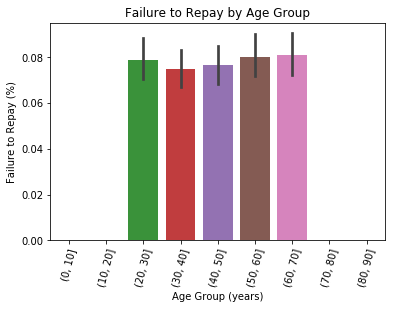

In [24]:
# 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖
import seaborn as sns
x=app_train['dis_DAYS_BIRTH']
y=app_train['TARGET']

sns.barplot(x, y)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

## 練習

In [5]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
t_app_train = os.path.join(dir_data, 'application_test.csv')
app_train1=pd.read_csv(t_app_train)

for col in app_train1:
    if app_train1[col].dtype=='object':
        if len(list(app_train1[col].unique()))<=2:
            #Return unique values of Series object. Hash table-based unique, therefore does NOT sort.
            #pd.Series([2, 1, 3, 3], name='A').unique() =>array[2,1,3]
            app_train1[col]=le.fit_transform(app_train1[col])
app_train1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
app_train1['AMT_INCOME_TOTAL'].describe()

count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [14]:
app_train['eqal_freq_AMT_INCOME_TOTAL']=pd.qcut(app_train['AMT_INCOME_TOTAL'].unique(),20)
app_train['eqal_freq_AMT_INCOME_TOTAL']

0            (188412.3, 208324.8]
1            (263682.0, 312277.5]
2           (58728.15, 71555.625]
3          (133116.75, 143457.75]
4           (121477.5, 133116.75]
5          (92481.638, 102234.15]
6          (156687.975, 171694.8]
7            (312277.5, 389925.0]
8          (111628.125, 121477.5]
9            (25649.999, 45203.4]
10           (208324.8, 233176.5]
11           (188412.3, 208324.8]
12         (156687.975, 171694.8]
13        (102234.15, 111628.125]
14           (71555.625, 81295.2]
15           (81295.2, 92481.638]
16           (389925.0, 591637.5]
17           (81295.2, 92481.638]
18           (263682.0, 312277.5]
19           (188412.3, 208324.8]
20           (171694.8, 188412.3]
21          (121477.5, 133116.75]
22            (45203.4, 58728.15]
23           (389925.0, 591637.5]
24           (71555.625, 81295.2]
25           (312277.5, 389925.0]
26        (102234.15, 111628.125]
27         (92481.638, 102234.15]
28          (121477.5, 133116.75]
29           (